In [4]:
# import
import numpy as np
import pandas as pd
import os
from datetime import datetime
import Levenshtein

In [2]:
action_df = pd.read_csv('./data/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')

/Users/hwesungryu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

action_df.sess_dt = action_df.sess_dt.astype(str)
action_df.hit_tm = action_df.hit_tm.astype(str)
action_df['date'] = action_df.sess_dt +' '+action_df.hit_tm
action_df['date'] = action_df['date'].map(lambda x: datetime.strptime(x,'%Y%m%d %H:%M'))

# to Datetime index 
action_df.sess_dt = pd.to_datetime(action_df.sess_dt)
action_df = action_df.sort_values('date',ascending=True)
action_df = action_df.set_index(['date'])


In [17]:
import Levenshtein

def caculate_sim(sample):
    '''
    리스트 넣으면 유사어 몇개 찾았는지 알려줌
    '''
    step = 0
    count = 0 
    count_dic = {}
    similarity_dic = {}
    
    
    for i in range(len(sample)):
        step+=1
        for j in range(step,len(sample)):
            similarity_dic[(sample[i],sample[j])]= Levenshtein.ratio(sample[i],sample[j])
    
    for i,j in similarity_dic.items():
            if (1<len(i[0])<=2) & (1<len(i[1])<=2):
                if 0.6 < j <= 1.1: # threshold == 0.6 
                    count+=1
#                     count_dic[i] = j
            if (len(i[0])<=1) & (len(i[1])<=1):
                if j == 1: # threshold == 0.6 
                    pass
                    
            elif (2<len(i[0])<=4) & (2<len(i[1])<=4):
                if 0.5 < j <= 1.1: # threshold == 0.4 
                    count+=1
            elif (4<len(i[0])<=6) & (4<len(i[1])<=6):
                if 0.45 < j <= 1.1: # threshold == 0.4 
                    count+=1
            else:
                if 0.4 < j <= 1.1: # threshold == 0.4 
                    count+=1
                    
#                     count_dic[i] = j
    


    return count



In [18]:
tmp = action_df[['clnt_id','action_type','sech_kwd']]
tmp = tmp[tmp.action_type == 0]
tmp.sech_kwd = tmp.sech_kwd.astype(str)

In [ ]:
tmp.reset_index()

In [19]:
ssim_dic = {}


for i in list(tmp.clnt_id.unique()):
    idx = tmp[tmp.clnt_id == i]
    ssim_dic[i] = caculate_sim(list(idx.sech_kwd))    

In [20]:
df = pd.DataFrame(list(ssim_dic.items()), columns=['clnt_id', 'sim_count'])

In [21]:
df

,clnt_id,sim_count
0,30605,2
1,28304,4
2,43159,0
3,24276,47
4,47444,36
...,...,...
38559,895,1
38560,31032,7
38561,31040,0
38562,4129,1


In [23]:
df.sim_count.max()

64041

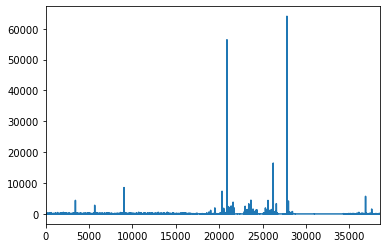

In [22]:
df.sim_count.plot()

In [27]:
df = df.sort_values('sim_count',ascending=False)

In [31]:
df

,clnt_id,sim_count
27800,69893,64041
20892,19555,56429
26222,48135,16474
9035,28570,8538
20326,9777,7348
...,...,...
20325,42973,0
20331,8295,0
20332,32205,0
20341,41835,0


In [35]:
df.iloc[0].sim_count=16000
df.iloc[1].sim_count=13000
df.iloc[2].sim_count=9000

In [36]:
df

,clnt_id,sim_count
27800,69893,16000
20892,19555,13000
26222,48135,9000
9035,28570,8538
20326,9777,7348
...,...,...
20325,42973,0
20331,8295,0
20332,32205,0
20341,41835,0


In [43]:
df.to_csv('단어유사도.csv')